**Let us explore the data set and identify the high rated shows on Amazon Prime**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Reading the data set
tv_shows = pd.read_csv("/kaggle/input/amazon-prime-tv-shows/Prime TV Shows Data set.csv",encoding="iso-8859-1")

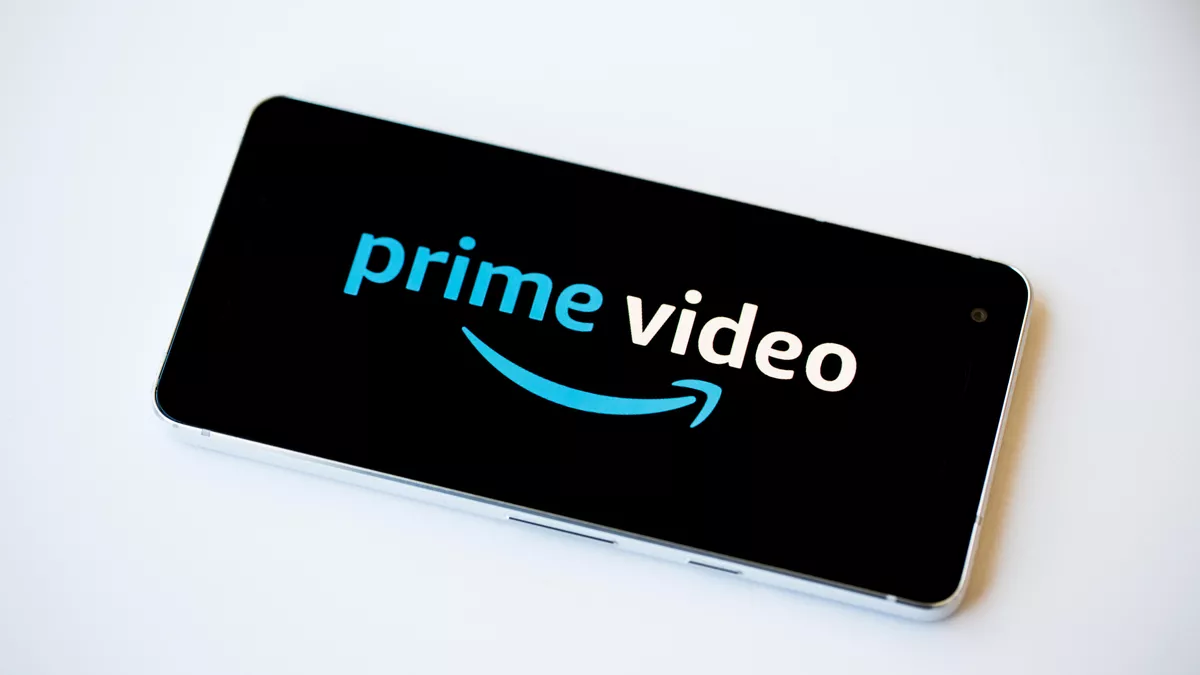

Amazon Prime is a paid subscription program from Amazon that gives users access to additional services otherwise unavailable or available at a premium to regular Amazon customers. Services include same, one or two-day delivery and streaming music and video.
In January 2020, Amazon reported that Prime had more than 150 million subscribers worldwide.<br>

The Prime Video service debuted on September 7, 2006 as Amazon Unbox in the United States. On September 4, 2008, the service was renamed Amazon Video on Demand. The Unbox name still refers to the local program, which as of August 2014 is no longer available for downloading purchased instant videos. On February 22, 2011, the service rebranded as Amazon Instant Video.

**Exploratory Data Analysis**

In [ ]:
# Let us look at the shape of the data
tv_shows.shape

So we can see that there are 503 rows and 8 columns or attributes in the data set, which means there are 503 TV shows of different categories or genres available on Prime.

In [ ]:
# Visualizing the first few rows of the data set
tv_shows.head(3)

In [ ]:
# Let us take a look at the data types of each variable
tv_shows.dtypes

In [ ]:
# Looking at the age of viewers
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x = "Age of viewers", data = tv_shows)

Here we can see that most of the shows are either 16+ (adult shows) or are for all age groups.

In [ ]:
# Let us take a look at the languages in which TV shows are being offered
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y = "Language", data = tv_shows)

Here we can see that most of the shows are having audio language as 'English', while he second audio language is 'Hindi'. This means that most of the shows on Amazon Prime are either Hindi or English while TV shows in other languages such as Japanese, Italian, Spanish are very less. 

In [ ]:
# Let us take a look at the genres of the TV shows
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y = "Genre", data = tv_shows)

We can see that most of the shows available are of the genre: 'drama', 'comedy' or are for 'kids'.

In [ ]:
# Let us take a look at how many seasons of the show are available on Prime
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y = "No of seasons available", data = tv_shows)

We can see here that only season 1 is available for most of the TV shows. While for some TV shows all the seasons are available on Prime, upto 9 or 10 seasons.

In [ ]:
# Let us now check for missing values
tv_shows.isnull().sum()

We can see that the variable IMDb ratings has the most missing values while there are no other missing values in any column.

We can fill or replace the missing values. In some cases, we can delete the rows with missing values and in some cases we can replace the missing values.But dropping rows or columns with missing values can lead to loss of information and precision. So we need to handle these missing values or replace them. 

In [ ]:
# Checking for outliers
sns.boxplot(x ='Age of viewers',y = 'IMDb rating',data = tv_shows,palette ='rainbow')

Since there are many outliers we will replace the missing value with the median value for the IMDb rating.

In [ ]:
# Replace using median 
median = tv_shows['IMDb rating'].median()
tv_shows['IMDb rating'].fillna(median, inplace=True)

Let us now check whether the missing values have been replaced or not.

In [ ]:
tv_shows.isnull().sum()

Now we can see that we don't have any missing values. 

In [ ]:
# Let us take a look at the top 20 high rated shows on Amazon Prime
tv_shows.sort_values(by = "IMDb rating", ascending = False).head(20)

In [ ]:
# Let us now take a look at 20 worst rated shows
tv_shows.sort_values(by = "IMDb rating", ascending = True).head(20)

**Let us now look at the top rated TV shows across different languages, genres as well as age categories**

In [ ]:
top_english = tv_shows[tv_shows['Language'] == 'English'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in english
top_english.head(10)

In [ ]:
# Top 10 TV shows in Hindi
top_hindi = tv_shows[tv_shows['Language'] == 'Hindi'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in hindi
top_hindi.head(10)

**Since most of the shows are of the genres: 'Drama', 'Comedy' and 'Kids'. Let us look at the top rated shows in each of these genres**

In [ ]:
# Top 10 TV shows in the genre: 'Drama'
top_drama = tv_shows[tv_shows['Genre'] == 'Drama'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in drama
top_drama.head(10)

In [ ]:
# Top 10 TV shows in the genre: 'Comedy'
top_comedy = tv_shows[tv_shows['Genre'] == 'Comedy'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in comedy
top_comedy.head(10)

In [ ]:
# Top 10 TV shows in the genre: 'Kids'
top_kids = tv_shows[tv_shows['Genre'] == 'Kids'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows for kids
top_kids.head(10)

In [ ]:
# Let us now look at the top 10 best shows released this year which are a must watch
top10 = tv_shows[tv_shows['Year of release'] == 2020].sort_values(by ='IMDb rating',ascending = False)
#Top 10 TV shows of 2020
top10.head(10)

### Most used words in the Title of the TV shows

In [ ]:
# Visualizing the most used words in the names of the TV shows
common_words = tv_shows['Name of the show'] 
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'GnBu', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(common_words))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()